In [1]:
# Step 1 : Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Load Fish dataset
fish = pd.read_csv("https://github.com/ybifoundation/Dataset/raw/main/Fish.csv")

# Preview
fish.head()


,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


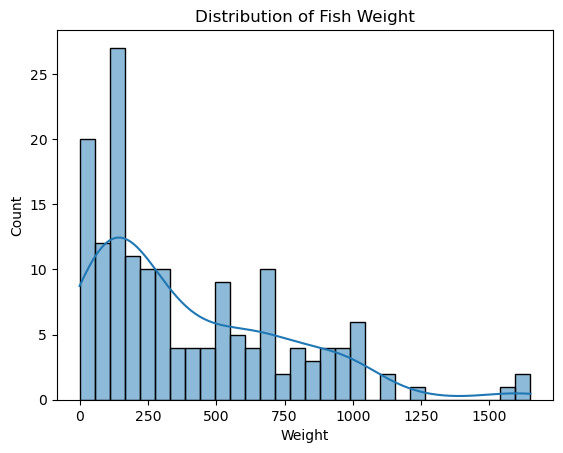

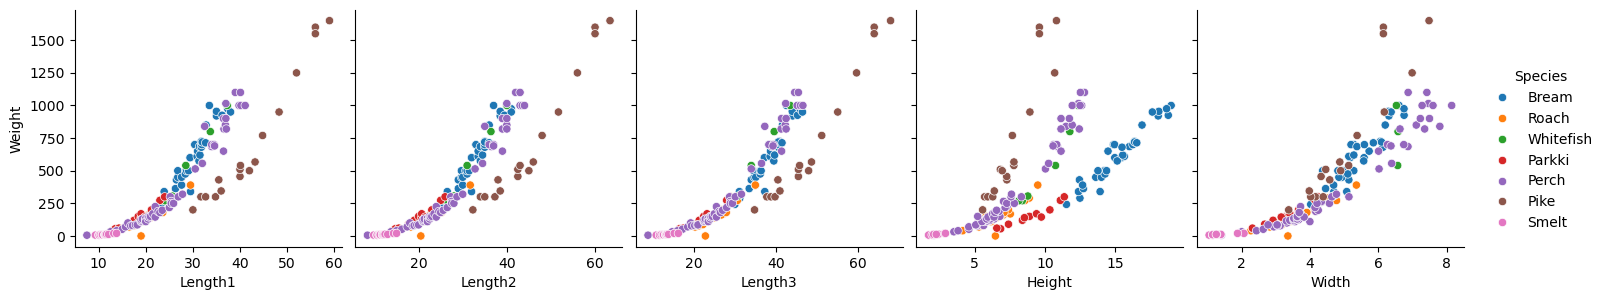

In [3]:
fish.info()
fish.describe()

# Check missing values
fish.isnull().sum()

# Visualize weight distribution
sns.histplot(fish["Weight"], bins=30, kde=True)
plt.title("Distribution of Fish Weight")
plt.show()

# Relationship between features and weight
sns.pairplot(fish, x_vars=["Length1","Length2","Length3","Height","Width"], y_vars="Weight", hue="Species", height=3)
plt.show()


In [4]:
y = fish["Weight"]

# Include categorical 'Species' as well
X = fish[["Species","Length1","Length2","Length3","Height","Width"]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)


In [6]:
# Encode categorical feature
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop="first"), ['Species']),
    ('num', 'passthrough', ['Length1','Length2','Length3','Height','Width'])
])

# Build pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Species']),
                                                 ('num', 'passthrough',
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width'])])),
                ('regressor', LinearRegression())])

In [7]:
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

# Compare Actual vs Predicted
df_compare = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
df_compare.head(10)


Mean Absolute Error: 75.53149041126615
Root Mean Squared Error: 93.24771265887632
R² Score: 0.9124587540890851


,Actual,Predicted
0,500.0,480.407777
1,390.0,543.856139
2,85.0,74.179072
3,567.0,733.047179
4,130.0,191.249998
5,169.0,279.269197
6,290.0,336.839343
7,260.0,367.369764
8,306.0,434.832141
9,9.8,-16.983850


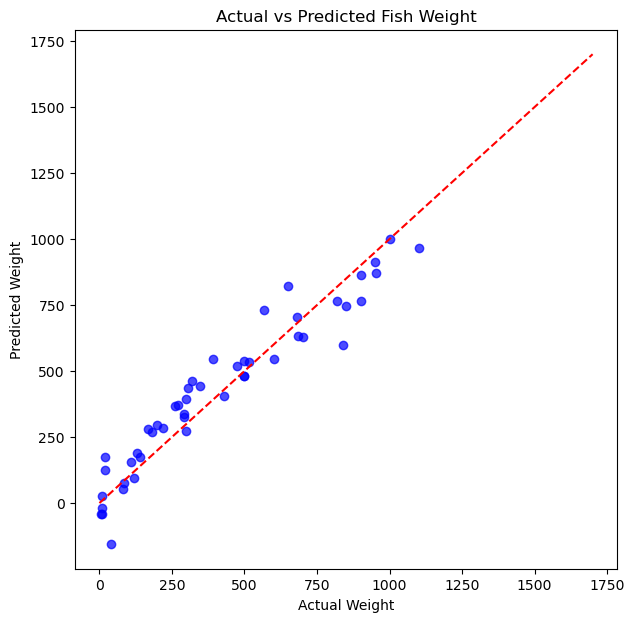

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([0, 1700], [0, 1700], color="red", linestyle="--")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Fish Weight")
plt.show()


In [9]:
ridge_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("R² Score with Ridge:", r2_score(y_test, y_pred_ridge))


R² Score with Ridge: 0.912423554983161
